In [1]:
import pandas as pd
import numpy as np

In [6]:
data = pd.read_csv("datanew.csv")

In [7]:
data

,Tarih,Kapanış
0,5 Kasım 2019,274.62
1,6 Kasım 2019,275.67
2,7 Kasım 2019,271.28
3,8 Kasım 2019,270.33
4,11 Kasım 2019,270.13
...,...,...
494,10 Ağustos 2021,477.90
495,12 Ağustos 2021,481.50
496,13 Ağustos 2021,487.10
497,14 Ağustos 2021,487.34


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class LinearRegression:
    def __init__(self,X,Y): 
        ones=np.ones(X.shape)
        X=np.append(ones,X,axis=1)
        self.X=X
        self.Y=Y
        self.m=X.shape[0]
        self.n=X.shape[1]
        self.theta=np.random.randn(X.shape[1])
        
    def computeCostFunction(self):
        h=np.matmul(self.X,self.theta)
        self.J=(1/(2*self.m))*np.sum((h-self.Y)**2)
        return self.J
    
    def performGradientDescent(self,num_of_iter,alpha):
        self.Cost_history=[]
        self.theta_history=[]
        for x in range(num_of_iter):
            h=np.matmul(self.X,self.theta)
            J=self.computeCostFunction()
            self.Cost_history.append(J)
            self.theta_history.append(self.theta)
            temp=h-self.Y
            self.theta=self.theta-(alpha/self.m)*(self.X.T.dot(temp))
        return self.theta,self.Cost_history,self.theta_history
            
        
    def predict(self,X_test,Y_test):
        ones=np.ones(X_test.shape)
        X_test=np.append(ones,X_test,axis=1)
        self.Y_pred=np.matmul(X_test,self.theta)
        self.error_percentage=(abs(self.Y_pred-Y_test)/Y_test)*100
        return self.Y_pred,self.error_percentage
    
    def predictUsingNormalEquation(self,X_test,Y_test):
        ones=np.ones(X_test.shape)
        X_test=np.append(ones,X_test,axis=1)
        inv=np.linalg.inv(np.matmul(self.X.T,self.X))
        self.w=np.matmul(np.matmul(inv,self.X.T),self.Y)
        y_pred=np.matmul(X_test,self.w)
        return y_pred,(abs(Y_test-y_pred)/Y_test)*100
        
        
    
        
    def returnTheta(self):
        return self.theta
    
    def returnX(self):
        return self.X
        
    def returnY(self):
        return self.Y

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Data provided
data = {
    "Tarih": ["5 Kasım 2019", "6 Kasım 2019", "7 Kasım 2019", "8 Kasım 2019", "11 Kasım 2019", "12 Kasım 2019"],
    "Kapanış": [274.62, 275.67, 271.28, 270.33, 270.13, 271.03]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Convert 'Tarih' to datetime format
df["Tarih"] = pd.to_datetime(df["Tarih"], format="%d %B %Y")

# Convert 'Kapanış' to numpy array for regression
X = np.array(range(len(df))).reshape(-1, 1)  # We use the day index as X (independent variable)
Y = df["Kapanış"].values  # The 'Kapanış' values as Y (dependent variable)

# Linear Regression Class
class LinearRegression:
    def __init__(self, X, Y): 
        ones = np.ones(X.shape[0])  # Add the bias term (intercept)
        self.X = np.hstack([ones.reshape(-1, 1), X])  # Add ones to X for intercept
        self.Y = Y
        self.m = X.shape[0]
        self.n = X.shape[1] + 1  # +1 for the intercept term
        self.theta = np.random.randn(self.n)  # Initial theta values

    def computeCostFunction(self):
        h = np.matmul(self.X, self.theta)  # Hypothesis
        self.J = (1 / (2 * self.m)) * np.sum((h - self.Y) ** 2)  # Cost function (MSE)
        return self.J
    
    def performGradientDescent(self, num_of_iter, alpha):
        self.Cost_history = []
        self.theta_history = []
        for x in range(num_of_iter):
            h = np.matmul(self.X, self.theta)
            J = self.computeCostFunction()
            self.Cost_history.append(J)
            self.theta_history.append(self.theta)
            temp = h - self.Y
            self.theta = self.theta - (alpha / self.m) * np.dot(self.X.T, temp)
        return self.theta, self.Cost_history, self.theta_history

    def predict(self, X_test):
        ones = np.ones(X_test.shape[0])
        X_test = np.hstack([ones.reshape(-1, 1), X_test])
        Y_pred = np.matmul(X_test, self.theta)
        return Y_pred

# Create Linear Regression model
model = LinearRegression(X, Y)

# Perform gradient descent for 1000 iterations with learning rate alpha = 0.01
theta, cost_history, theta_history = model.performGradientDescent(num_of_iter=1000, alpha=0.01)

# Plotting the original data and the regression line
plt.figure(figsize=(10, 6))
plt.plot(df["Tarih"], df["Kapanış"], label="Actual Data", color='black', marker='o')

# Predict values using the model
Y_pred = model.predict(X)

# Plotting the regression line
plt.plot(df["Tarih"], Y_pred, label="Regression Line", color='red', linestyle='-', linewidth=2)

# Labeling the chart
plt.title('Gold Price Regression Line (Linear Regression)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Gold Price (Kapanış)', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


ValueError: time data "5 Kasım 2019" doesn't match format "%d %B %Y", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

Task 1

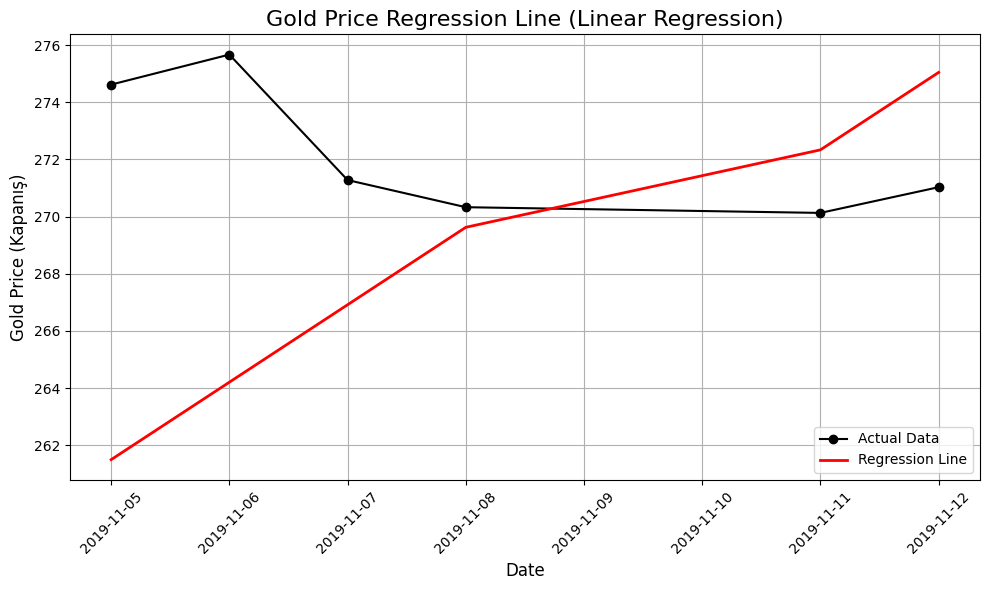

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Data provided
data = {
    "Tarih": ["5 Kasım 2019", "6 Kasım 2019", "7 Kasım 2019", "8 Kasım 2019", "11 Kasım 2019", "12 Kasım 2019"],
    "Kapanış": [274.62, 275.67, 271.28, 270.33, 270.13, 271.03]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Create a dictionary to translate Turkish month names to English
month_translation = {
    'Ocak': 'January', 'Şubat': 'February', 'Mart': 'March', 'Nisan': 'April', 'Mayıs': 'May', 'Haziran': 'June',
    'Temmuz': 'July', 'Ağustos': 'August', 'Eylül': 'September', 'Ekim': 'October', 'Kasım': 'November', 'Aralık': 'December'
}

# Function to replace Turkish month names with English ones
def translate_month_names(date_str):
    for tr_month, en_month in month_translation.items():
        if tr_month in date_str:
            date_str = date_str.replace(tr_month, en_month)
    return date_str

# Apply the translation to the 'Tarih' column
df["Tarih"] = df["Tarih"].apply(translate_month_names)

# Convert 'Tarih' to datetime format using the translated months and 'dayfirst=True'
df["Tarih"] = pd.to_datetime(df["Tarih"], format="%d %B %Y")

# Convert 'Kapanış' to numpy array for regression
X = np.array(range(len(df))).reshape(-1, 1)  # We use the day index as X (independent variable)
Y = df["Kapanış"].values  # The 'Kapanış' values as Y (dependent variable)

# Linear Regression Class
class LinearRegression:
    def __init__(self, X, Y): 
        ones = np.ones(X.shape[0])  # Add the bias term (intercept)
        self.X = np.hstack([ones.reshape(-1, 1), X])  # Add ones to X for intercept
        self.Y = Y
        self.m = X.shape[0]
        self.n = X.shape[1] + 1  # +1 for the intercept term
        self.theta = np.random.randn(self.n)  # Initial theta values

    def computeCostFunction(self):
        h = np.matmul(self.X, self.theta)  # Hypothesis
        self.J = (1 / (2 * self.m)) * np.sum((h - self.Y) ** 2)  # Cost function (MSE)
        return self.J
    
    def performGradientDescent(self, num_of_iter, alpha):
        self.Cost_history = []
        self.theta_history = []
        for x in range(num_of_iter):
            h = np.matmul(self.X, self.theta)
            J = self.computeCostFunction()
            self.Cost_history.append(J)
            self.theta_history.append(self.theta)
            temp = h - self.Y
            self.theta = self.theta - (alpha / self.m) * np.dot(self.X.T, temp)
        return self.theta, self.Cost_history, self.theta_history

    def predict(self, X_test):
        ones = np.ones(X_test.shape[0])
        X_test = np.hstack([ones.reshape(-1, 1), X_test])
        Y_pred = np.matmul(X_test, self.theta)
        return Y_pred

# Create Linear Regression model
model = LinearRegression(X, Y)

# Perform gradient descent for 1000 iterations with learning rate alpha = 0.01
theta, cost_history, theta_history = model.performGradientDescent(num_of_iter=1000, alpha=0.01)

# Plotting the original data and the regression line
plt.figure(figsize=(10, 6))
plt.plot(df["Tarih"], df["Kapanış"], label="Actual Data", color='black', marker='o')

# Predict values using the model
Y_pred = model.predict(X)

# Plotting the regression line
plt.plot(df["Tarih"], Y_pred, label="Regression Line", color='red', linestyle='-', linewidth=2)

# Labeling the chart
plt.title('Gold Price Regression Line (Linear Regression)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Gold Price (Kapanış)', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Task 1 solution

           Tarih  Kapanış
0   5 Kasım 2019   274.62
1   6 Kasım 2019   275.67
2   7 Kasım 2019   271.28
3   8 Kasım 2019   270.33
4  11 Kasım 2019   270.13


/home/furkanblt/anaconda3/envs/ML_Datathon/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/tmp/ipykernel_8495/2523842587.py:48: RuntimeWarning: overflow encountered in square
  self.J = (1 / (2 * self.m)) * np.sum((h - self.Y) ** 2)  # Cost function (MSE)
/tmp/ipykernel_8495/2523842587.py:55: RuntimeWarning: invalid value encountered in matmul
  h=np.matmul(self.X,self.theta)
/tmp/ipykernel_8495/2523842587.py:47: RuntimeWarning: invalid value encountered in matmul
  h = np.matmul(self.X, self.theta)  # Hypothesis


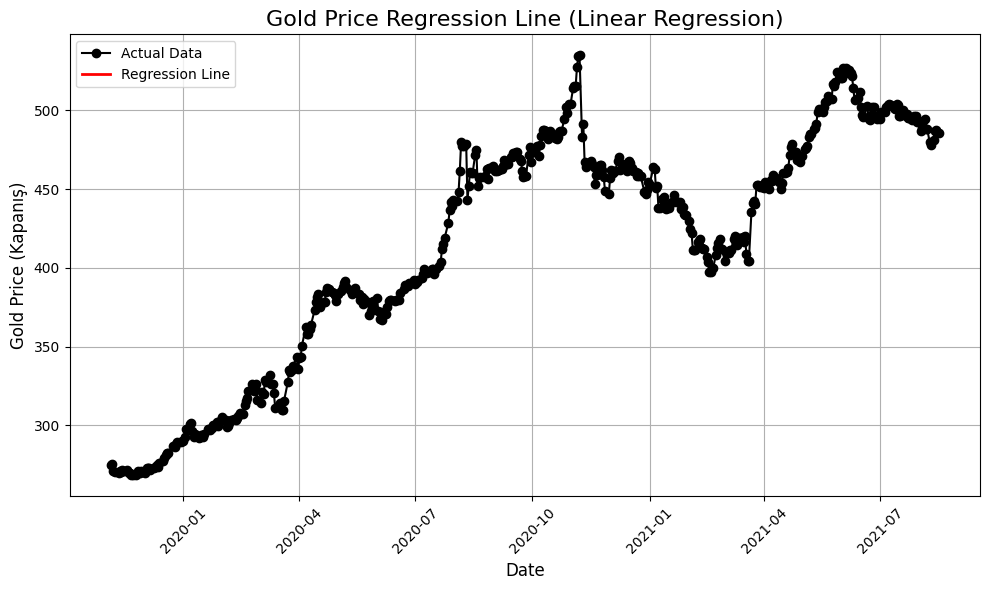

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Read data from CSV file
data = pd.read_csv("datanew.csv")

# Check the first few rows of the data to understand its structure
print(data.head())

# Assuming 'Tarih' is the date column and 'Kapanış' is the price column

# Create a dictionary to translate Turkish month names to English
month_translation = {
    'Ocak': 'January', 'Şubat': 'February', 'Mart': 'March', 'Nisan': 'April', 'Mayıs': 'May', 'Haziran': 'June',
    'Temmuz': 'July', 'Ağustos': 'August', 'Eylül': 'September', 'Ekim': 'October', 'Kasım': 'November', 'Aralık': 'December'
}

# Function to replace Turkish month names with English ones
def translate_month_names(date_str):
    for tr_month, en_month in month_translation.items():
        if tr_month in date_str:
            date_str = date_str.replace(tr_month, en_month)
    return date_str

# Apply the translation to the 'Tarih' column
data["Tarih"] = data["Tarih"].apply(translate_month_names)

# Convert 'Tarih' to datetime format using the translated months and 'dayfirst=True'
data["Tarih"] = pd.to_datetime(data["Tarih"], format="%d %B %Y")

# Convert 'Kapanış' to numpy array for regression
X = np.array(range(len(data))).reshape(-1, 1)  # We use the day index as X (independent variable)
Y = data["Kapanış"].values  # The 'Kapanış' values as Y (dependent variable)

# Linear Regression Class
class LinearRegression:
    def __init__(self, X, Y): 
        ones = np.ones(X.shape[0])  # Add the bias term (intercept)
        self.X = np.hstack([ones.reshape(-1, 1), X])  # Add ones to X for intercept
        self.Y = Y
        self.m = X.shape[0]
        self.n = X.shape[1] + 1  # +1 for the intercept term
        self.theta = np.random.randn(self.n)  # Initial theta values

    def computeCostFunction(self):
        h = np.matmul(self.X, self.theta)  # Hypothesis
        self.J = (1 / (2 * self.m)) * np.sum((h - self.Y) ** 2)  # Cost function (MSE)
        return self.J
    
    def performGradientDescent(self,num_of_iter,alpha):
        self.Cost_history=[]
        self.theta_history=[]
        for x in range(num_of_iter):
            h=np.matmul(self.X,self.theta)
            J=self.computeCostFunction()
            self.Cost_history.append(J)
            self.theta_history.append(self.theta)
            temp=h-self.Y
            self.theta=self.theta-(alpha/self.m)*(self.X.T.dot(temp))
        return self.theta,self.Cost_history,self.theta_history
            


    def predict(self, X_test):
        ones = np.ones(X_test.shape[0])
        X_test = np.hstack([ones.reshape(-1, 1), X_test])
        Y_pred = np.matmul(X_test, self.theta)
        return Y_pred

# Create Linear Regression model
model = LinearRegression(X, Y)

# Perform gradient descent for 1000 iterations with learning rate alpha = 0.01
theta, cost_history, theta_history = model.performGradientDescent(num_of_iter=1000, alpha=0.01)

# Plotting the original data and the regression line
plt.figure(figsize=(10, 6))
plt.plot(data["Tarih"], data["Kapanış"], label="Actual Data", color='black', marker='o')

# Predict values using the model
Y_pred = model.predict(X)

# Plotting the regression line
plt.plot(data["Tarih"], Y_pred, label="Regression Line", color='red', linestyle='-', linewidth=2)

# Labeling the chart
plt.title('Gold Price Regression Line (Linear Regression)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Gold Price (Kapanış)', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Task 2

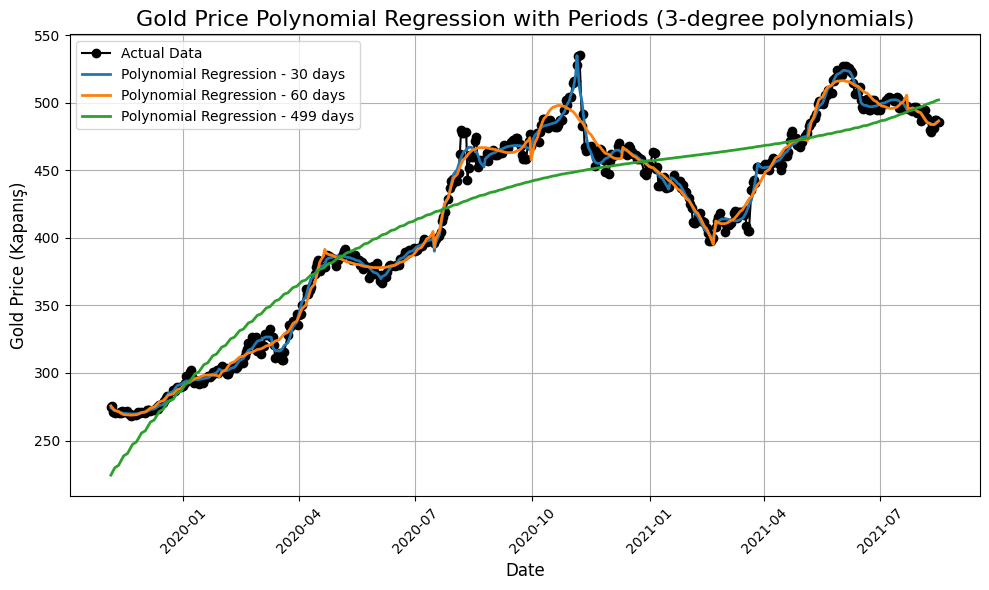

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Read data from CSV file
data = pd.read_csv("datanew.csv")

# Create a dictionary to translate Turkish month names to English
month_translation = {
    'Ocak': 'January', 'Şubat': 'February', 'Mart': 'March', 'Nisan': 'April', 'Mayıs': 'May', 'Haziran': 'June',
    'Temmuz': 'July', 'Ağustos': 'August', 'Eylül': 'September', 'Ekim': 'October', 'Kasım': 'November', 'Aralık': 'December'
}

# Function to replace Turkish month names with English ones
def translate_month_names(date_str):
    for tr_month, en_month in month_translation.items():
        if tr_month in date_str:
            date_str = date_str.replace(tr_month, en_month)
    return date_str

# Apply the translation to the 'Tarih' column
data["Tarih"] = data["Tarih"].apply(translate_month_names)

# Convert 'Tarih' to datetime format using the translated months and 'dayfirst=True'
data["Tarih"] = pd.to_datetime(data["Tarih"], format="%d %B %Y")

# Convert 'Kapanış' to numpy array for regression
X = np.array(range(len(data))).reshape(-1, 1)  # We use the day index as X (independent variable)
Y = data["Kapanış"].values  # The 'Kapanış' values as Y (dependent variable)

# Polynomial Regression Class
class PolynomialRegression:
    def __init__(self, degree):
        self.degree = degree

    def fit(self, X, Y):
        # Fit a polynomial regression of the specified degree
        self.coefficients = np.polyfit(X.flatten(), Y, self.degree)
        self.poly = np.poly1d(self.coefficients)
        
    def predict(self, X):
        # Predict using the polynomial regression
        return self.poly(X.flatten())

# Function to apply polynomial regression on different periods
def apply_polynomial_regression(X, Y, period, degree):
    predictions = []
    
    # Split the data into chunks based on the period
    for i in range(0, len(X), period):
        # Define the current chunk
        X_chunk = X[i:i+period]
        Y_chunk = Y[i:i+period]
        
        # Fit a polynomial regression for this chunk
        model = PolynomialRegression(degree)
        model.fit(X_chunk, Y_chunk)
        
        # Predict using the model for this chunk
        Y_pred_chunk = model.predict(X_chunk)
        predictions.extend(Y_pred_chunk)
        
    return np.array(predictions)

# Plotting the results
def plot_regression_lines(X, Y, periods, degree):
    plt.figure(figsize=(10, 6))
    
    # Plot the actual data
    plt.plot(data["Tarih"], Y, label="Actual Data", color='black', marker='o')
    
    # Plot the polynomial regression lines for different periods
    for period in periods:
        Y_pred = apply_polynomial_regression(X, Y, period, degree)
        plt.plot(data["Tarih"][:len(Y_pred)], Y_pred, label=f"Polynomial Regression - {period} days", linewidth=2)
    
    # Labeling the chart
    plt.title(f'Gold Price Polynomial Regression with Periods ({degree}-degree polynomials)', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Gold Price (Kapanış)', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Define periods and polynomial degree
periods = [30, 60, len(X)]  # Example periods: 30 days, 60 days, and entire dataset
degree = 3  # Polynomial degree (can be adjusted to 2, 3, 4, etc.)

# Plot polynomial regression lines
plot_regression_lines(X, Y, periods, degree)


Task 3

In [31]:
# Linear Regression Predictions
Y_pred_linear = model.predict(X)

# Polynomial Regression Predictions for different periods
periods = [30, 60, len(X)]  # Example periods: 30 days, 60 days, and entire dataset
degree = 3  # Polynomial degree (can be adjusted to 2, 3, 4, etc.)

# Apply polynomial regression
Y_pred_polynomial = apply_polynomial_regression(X, Y, period=30, degree=degree)

# Print the results of both models for comparison
print("Linear Regression Predictions:")
print(Y_pred_linear)

print("\nPolynomial Regression Predictions (for period 30 days):")
print(Y_pred_polynomial)


Linear Regression Predictions:
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan

In [34]:
# Linear Regression Prediction
Y_pred_linear = model.predict(X)

# Print Linear Regression predictions
print("Linear Regression Predictions:")
print(Y_pred_linear)

# Polynomial Regression Prediction (for different periods)
periods = [30, 60, len(X)]  # Example periods: 30 days, 60 days, and entire dataset
degree = 3  # Polynomial degree (can be adjusted to 2, 3, 4, etc.)

# Apply polynomial regression and get predictions for each period
print("\nPolynomial Regression Predictions:")
for period in periods:
    Y_pred_poly = apply_polynomial_regression(X, Y, period, degree)
    print(f"Predictions for {period} days period:")
    print(Y_pred_poly)


Linear Regression Predictions:
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan

Tarih      0
Kapanış    0
dtype: int64
Linear Regression Predictions:
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan n

/tmp/ipykernel_8495/690738898.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Tarih"] = pd.to_datetime(data["Tarih"], errors='coerce')
/home/furkanblt/anaconda3/envs/ML_Datathon/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/tmp/ipykernel_8495/690738898.py:33: RuntimeWarning: overflow encountered in square
  self.J = (1 / (2 * self.m)) * np.sum((h - self.Y) ** 2)  # Cost function (MSE)
/tmp/ipykernel_8495/690738898.py:40: RuntimeWarning: invalid value encountered in matmul
  h = np.matmul(self.X, self.theta)
/tmp/ipykernel_8495/690738898.py:32: RuntimeWarning: invalid value encountered in matmul
  h = np.matmul(self.X, self.theta)  # Hypothesis


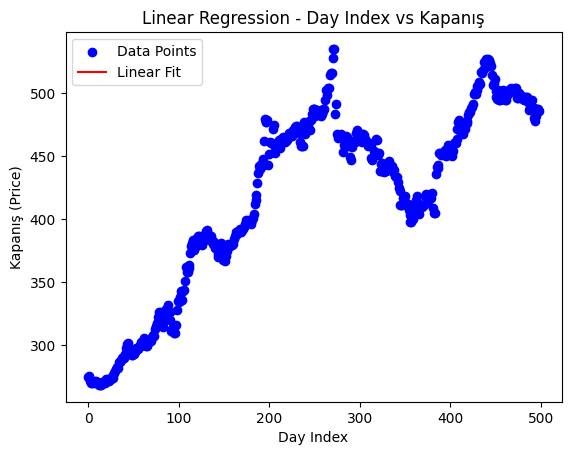

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace this with your actual CSV data loading)
data = pd.read_csv("datanew.csv")

# Check for missing values and handle them
print(data.isnull().sum())  # Check missing values
data = data.dropna()  # Drop rows with any NaN values

# Ensure 'Kapanış' (price) is numeric, and convert 'Tarih' (date) to datetime
data["Kapanış"] = pd.to_numeric(data["Kapanış"], errors='coerce')
data = data.dropna(subset=["Kapanış"])  # Remove rows where 'Kapanış' is NaN
data["Tarih"] = pd.to_datetime(data["Tarih"], errors='coerce')

# Let's assume 'Tarih' (date) is being used to generate the independent variable (X)
X = np.array(range(len(data))).reshape(-1, 1)  # Day index as independent variable
Y = data["Kapanış"].values  # The 'Kapanış' values as dependent variable

# Linear Regression Class (with gradient descent)
class LinearRegression:
    def __init__(self, X, Y): 
        ones = np.ones(X.shape[0])  # Add the bias term (intercept)
        self.X = np.hstack([ones.reshape(-1, 1), X])  # Add ones to X for intercept
        self.Y = Y
        self.m = X.shape[0]
        self.n = X.shape[1] + 1  # +1 for the intercept term
        self.theta = np.random.randn(self.n)  # Initial theta values (random)

    def computeCostFunction(self):
        h = np.matmul(self.X, self.theta)  # Hypothesis
        self.J = (1 / (2 * self.m)) * np.sum((h - self.Y) ** 2)  # Cost function (MSE)
        return self.J

    def performGradientDescent(self, num_of_iter, alpha):
        self.Cost_history = []
        self.theta_history = []
        for x in range(num_of_iter):
            h = np.matmul(self.X, self.theta)
            J = self.computeCostFunction()
            self.Cost_history.append(J)
            self.theta_history.append(self.theta)
            temp = h - self.Y
            self.theta = self.theta - (alpha / self.m) * np.dot(self.X.T, temp)
        return self.theta, self.Cost_history, self.theta_history

    def predict(self, X_test):
        ones = np.ones(X_test.shape[0])
        X_test = np.hstack([ones.reshape(-1, 1), X_test])
        Y_pred = np.matmul(X_test, self.theta)
        return Y_pred

# Create Linear Regression model
model = LinearRegression(X, Y)

# Perform gradient descent for 1000 iterations with learning rate alpha = 0.01
theta, cost_history, theta_history = model.performGradientDescent(num_of_iter=1000, alpha=0.01)

# Make predictions
Y_pred_linear = model.predict(X)
print("Linear Regression Predictions:")
print(Y_pred_linear)

# Plot the data and the linear regression fit
plt.scatter(X, Y, color='blue', label='Data Points')  # Original Data
plt.plot(X, Y_pred_linear, color='red', label='Linear Fit')  # Linear Regression Line
plt.xlabel("Day Index")
plt.ylabel("Kapanış (Price)")
plt.title("Linear Regression - Day Index vs Kapanış")
plt.legend()
plt.show()


Predictions:  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan 

/tmp/ipykernel_8495/903486142.py:18: RuntimeWarning: overflow encountered in square
  self.J = (1 / (2 * self.m)) * np.sum((h - self.Y) ** 2)  # Cost function (MSE)
/home/furkanblt/anaconda3/envs/ML_Datathon/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/tmp/ipykernel_8495/903486142.py:25: RuntimeWarning: invalid value encountered in matmul
  h = np.matmul(self.X, self.theta)
/tmp/ipykernel_8495/903486142.py:17: RuntimeWarning: invalid value encountered in matmul
  h = np.matmul(self.X, self.theta)  # Hypothesis


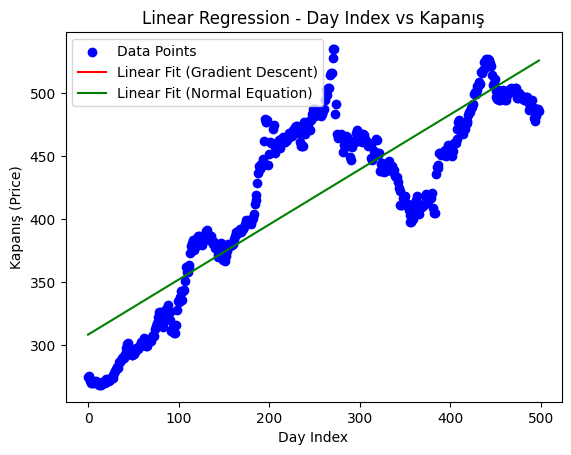

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class LinearRegression:
    def __init__(self, X, Y): 
        # Add a column of ones to X to account for the intercept term (bias)
        ones = np.ones((X.shape[0], 1))
        X = np.hstack([ones, X])
        self.X = X
        self.Y = Y
        self.m = X.shape[0]  # Number of training examples
        self.n = X.shape[1]  # Number of features (including the intercept)
        self.theta = np.random.randn(self.n)  # Random initialization of theta

    def computeCostFunction(self):
        h = np.matmul(self.X, self.theta)  # Hypothesis
        self.J = (1 / (2 * self.m)) * np.sum((h - self.Y) ** 2)  # Cost function (MSE)
        return self.J

    def performGradientDescent(self, num_of_iter, alpha):
        self.Cost_history = []
        self.theta_history = []
        for _ in range(num_of_iter):
            h = np.matmul(self.X, self.theta)
            J = self.computeCostFunction()  # Calculate the cost
            self.Cost_history.append(J)
            self.theta_history.append(self.theta.copy())  # Store the current theta value
            error = h - self.Y
            self.theta -= (alpha / self.m) * np.dot(self.X.T, error)  # Update theta
        return self.theta, self.Cost_history, self.theta_history

    def predict(self, X_test, Y_test):
        # Add a column of ones to X_test to account for the intercept term
        ones = np.ones((X_test.shape[0], 1))
        X_test = np.hstack([ones, X_test])
        self.Y_pred = np.matmul(X_test, self.theta)  # Make predictions
        self.error_percentage = (abs(self.Y_pred - Y_test) / Y_test) * 100  # Calculate error percentage
        return self.Y_pred, self.error_percentage

    def predictUsingNormalEquation(self, X_test, Y_test):
        # Add a column of ones to X_test to account for the intercept term
        ones = np.ones((X_test.shape[0], 1))
        X_test = np.hstack([ones, X_test])
        # Normal equation to calculate optimal theta
        inv = np.linalg.inv(np.matmul(self.X.T, self.X))
        self.w = np.matmul(np.matmul(inv, self.X.T), self.Y)
        y_pred = np.matmul(X_test, self.w)
        error_percentage = (abs(Y_test - y_pred) / Y_test) * 100  # Calculate error percentage
        return y_pred, error_percentage

    def returnTheta(self):
        return self.theta
    
    def returnX(self):
        return self.X
    
    def returnY(self):
        return self.Y


# Example Usage

# Sample Data - Replace with actual data
data = pd.read_csv("datanew.csv")

# Assuming 'Kapanış' column is the target and 'Tarih' is the feature
# Preprocessing the data
X = np.array(range(len(data))).reshape(-1, 1)  # Day index (as an example feature)
Y = data["Kapanış"].values  # Target variable

# Initialize Linear Regression model
model = LinearRegression(X, Y)

# Perform gradient descent
theta, cost_history, theta_history = model.performGradientDescent(num_of_iter=1000, alpha=0.01)

# Make predictions using the model
Y_pred, error_percentage = model.predict(X, Y)

# Print predictions and error percentages
print("Predictions: ", Y_pred)
print("Error Percentage: ", error_percentage)

# Make predictions using Normal Equation
y_pred_ne, error_percentage_ne = model.predictUsingNormalEquation(X, Y)

# Print predictions and error percentages for Normal Equation
print("Predictions using Normal Equation: ", y_pred_ne)
print("Error Percentage using Normal Equation: ", error_percentage_ne)

# Plotting the data and regression line
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, Y_pred, color='red', label='Linear Fit (Gradient Descent)')
plt.plot(X, y_pred_ne, color='green', label='Linear Fit (Normal Equation)')
plt.xlabel("Day Index")
plt.ylabel("Kapanış (Price)")
plt.title("Linear Regression - Day Index vs Kapanış")
plt.legend()
plt.show()